<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [2]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [3]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [5]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [6]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [7]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [8]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [9]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df = df.drop(['ID'], axis=1)

### Task 4: Data Prep & Start H2O

In [11]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/share/virtualenvs/Project-nXiLIa2f/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp50b87kbs
  JVM stdout: /tmp/tmp50b87kbs/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmp50b87kbs/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_rhyme_cbrkwv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.924 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [12]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [14]:
train, test = h2o_df.split_frame(ratios=[.75])

# Identify predictors and response
x = train.columns
y = "TERM_DEPOSIT"
x.remove(y)

### Task 5: Run H2O AutoML

In [15]:
from h2o.automl import H2OAutoML

In [16]:
aml = H2OAutoML(max_runtime_secs=600,
                #exclude_algos=['DeepLearning'],
                seed=1,
                #stopping_metric='logloss',
                #sort_metric='logloss',
                balance_classes=False,
                project_name='Completed'
)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 15s, sys: 1.17 s, total: 1min 16s
Wall time: 9min 55s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [17]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200608_075205,0.935291,0.216207,0.630377,0.170644,0.255032,0.0650414
StackedEnsemble_BestOfFamily_AutoML_20200608_075205,0.934623,0.216897,0.62776,0.161546,0.255318,0.0651873
XGBoost_grid__1_AutoML_20200608_075205_model_2,0.933282,0.201119,0.620389,0.155107,0.251765,0.0633859
GBM_grid__1_AutoML_20200608_075205_model_3,0.932825,0.201748,0.618951,0.174402,0.251144,0.0630735
GBM_grid__1_AutoML_20200608_075205_model_2,0.932113,0.204417,0.615504,0.176913,0.253331,0.0641765
GBM_2_AutoML_20200608_075205,0.931011,0.210677,0.616628,0.19417,0.253388,0.0642056
GBM_5_AutoML_20200608_075205,0.929653,0.213652,0.611578,0.184694,0.254616,0.0648293
GBM_3_AutoML_20200608_075205,0.929578,0.211067,0.612763,0.183456,0.253717,0.0643724
GBM_grid__1_AutoML_20200608_075205_model_1,0.92929,0.207386,0.610582,0.177761,0.25359,0.0643079
XGBoost_grid__1_AutoML_20200608_075205_model_1,0.929077,0.206504,0.60872,0.160715,0.254812,0.0649291


In [18]:
# Get the "All Models" Stacked Ensemble model
se = aml.leader

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [19]:
metalearner.varimp()

[('DRF_1_AutoML_20200608_075205', 0.257699221205873, 1.0, 0.1649780967770687),
 ('GBM_5_AutoML_20200608_075205',
  0.2406723666021832,
  0.9339274114837651,
  0.15407756687452587),
 ('XGBoost_grid__1_AutoML_20200608_075205_model_2',
  0.23748911721446977,
  0.9215748348138871,
  0.15203966228523658),
 ('XRT_1_AutoML_20200608_075205',
  0.22858334834797317,
  0.8870160618970614,
  0.14633822170246774),
 ('GBM_grid__1_AutoML_20200608_075205_model_3',
  0.1875696328497552,
  0.7278626298210964,
  0.12008139138303658),
 ('XGBoost_grid__1_AutoML_20200608_075205_model_1',
  0.1537605571456037,
  0.5966667513626908,
  0.09843694504997319),
 ('XGBoost_grid__1_AutoML_20200608_075205_model_3',
  0.11573185473922407,
  0.44909664141657296,
  0.07409110916987989),
 ('XGBoost_grid__1_AutoML_20200608_075205_model_4',
  0.04546454508282378,
  0.17642484470879585,
  0.02910623510424704),
 ('XGBoost_2_AutoML_20200608_075205',
  0.03945442319458132,
  0.15310260935193756,
  0.025258577102485698),
 ('GBM

### Task 7: Baselearner Model Exploration

In [20]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200608_075205_model_2')

In [21]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06193619733656632
RMSE: 0.24886984015056207
LogLoss: 0.19877530037463095
Mean Per-Class Error: 0.13010147001580363
AUC: 0.9336669865154459
AUCPR: 0.6186280656683495
Gini: 0.8673339730308918

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3239411446783278: 


,,no,yes,Error,Rate
0,no,9355.0,640.0,0.064,(640.0/9995.0)
1,yes,418.0,889.0,0.3198,(418.0/1307.0)
2,Total,9773.0,1529.0,0.0936,(1058.0/11302.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.323941,0.626939,196.0
1,max f2,0.109537,0.731616,294.0
2,max f0point5,0.448814,0.618539,153.0
3,max accuracy,0.448814,0.911962,153.0
4,max precision,0.937792,0.804348,9.0
5,max recall,0.000623,1.000000,398.0
6,max specificity,0.977309,0.999900,0.0
7,max absolute_mcc,0.202402,0.580746,246.0
8,max min_per_class_accuracy,0.144244,0.862531,275.0
9,max mean_per_class_accuracy,0.088206,0.869899,307.0



Gains/Lift Table: Avg response rate: 11.56 %, avg score: 11.69 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010087,0.890582,6.750950,6.750950,0.780702,0.928075,0.780702,0.928075,0.068095,0.068095,575.094968,575.094968
1,,2,0.020085,0.824113,6.734168,6.742596,0.778761,0.856851,0.779736,0.892620,0.067330,0.135425,573.416796,574.259578
2,,3,0.030083,0.762675,6.121971,6.536329,0.707965,0.792505,0.755882,0.859347,0.061209,0.196634,512.197087,553.632927
3,,4,0.040081,0.703921,5.739348,6.337524,0.663717,0.734779,0.732892,0.828273,0.057383,0.254017,473.934769,533.752371
4,,5,0.050080,0.649042,5.280200,6.126433,0.610619,0.676779,0.708481,0.798028,0.052793,0.306809,428.019988,512.643256
5,,6,0.100071,0.437505,4.790442,5.459028,0.553982,0.539605,0.631300,0.668931,0.239480,0.546289,379.044221,445.902800
6,,7,0.150062,0.284996,3.443609,4.787618,0.398230,0.357387,0.553656,0.565144,0.172150,0.718439,244.360862,378.761765
7,,8,0.200053,0.175393,2.234519,4.149625,0.258407,0.226859,0.479876,0.480610,0.111706,0.830145,123.451937,314.962538
8,,9,0.300035,0.068435,1.140217,3.146785,0.131858,0.111913,0.363904,0.357747,0.114002,0.944147,14.021707,214.678510
9,,10,0.400018,0.032173,0.336708,2.444421,0.038938,0.047056,0.282681,0.280092,0.033665,0.977812,-66.329160,144.442132


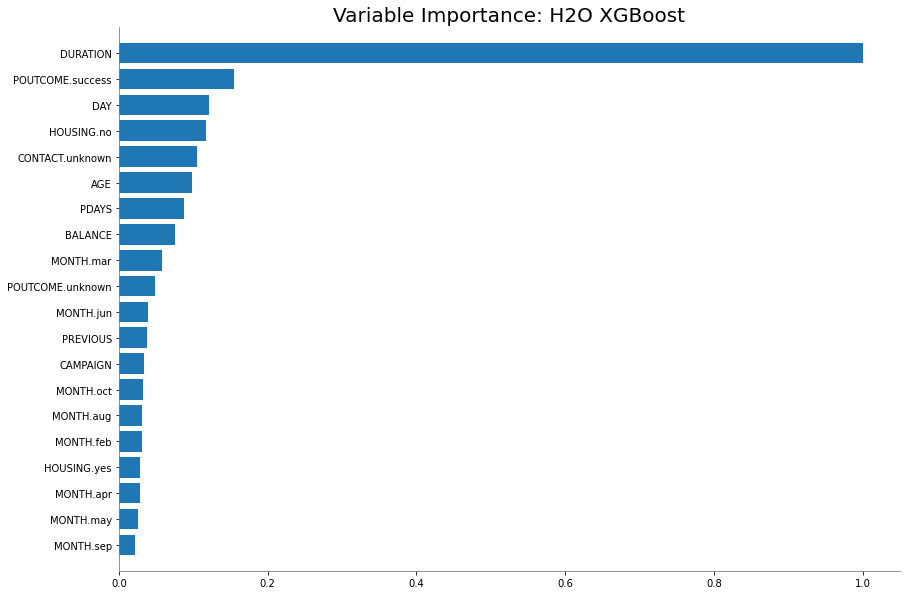

In [22]:
model.varimp_plot(num_of_features=20)

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


/home/rhyme/.local/share/virtualenvs/Project-nXiLIa2f/lib/python3.6/site-packages/h2o/model/model_base.py:1359: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  axs.fill_between(x, lower, upper, where=lower < upper, alpha=0.1, interpolate=False)


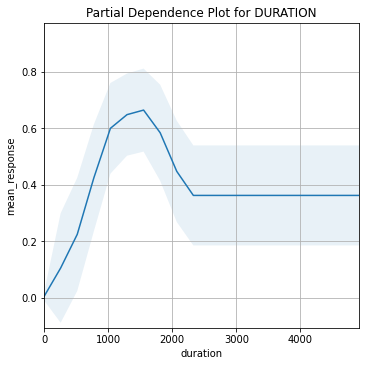

In [23]:
model.partial_plot(train, cols=["DURATION"], figsize=(5,5));

In [ ]:
# save the model
model_path = h2o.save_model(model=model, path='/home/rhyme/Desktop/Project/', force=True)
print(model_path)

### (Optional) Correlation Analysis

In [24]:
copy = df.copy()
copy.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
bin_labels = ['bin1', 'bin2', 'bin3', 'bin4']
copy[['AGE','BALANCE','DAY','DURATION']] = copy[['AGE','BALANCE','DAY','DURATION']].transform(lambda x: pd.qcut(x, q=4, labels=bin_labels))

In [26]:
copy['CAMPAIGN'] = pd.qcut(copy.CAMPAIGN, q=4, duplicates='drop', labels=bin_labels[:3])

In [27]:
copy['PDAYS'] = pd.qcut(copy.PDAYS, q=4, duplicates='drop', labels=bin_labels[:1])

In [28]:
copy['PREVIOUS'] = pd.qcut(copy.PREVIOUS, q=4, duplicates='drop', labels=bin_labels[:1])

In [29]:
copy.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,bin4,management,married,tertiary,no,bin4,yes,no,unknown,bin1,may,bin3,bin1,bin1,bin1,unknown,no
1,bin3,technician,single,secondary,no,bin1,yes,no,unknown,bin1,may,bin2,bin1,bin1,bin1,unknown,no
2,bin1,entrepreneur,married,secondary,no,bin1,yes,yes,unknown,bin1,may,bin1,bin1,bin1,bin1,unknown,no
3,bin3,blue-collar,married,unknown,no,bin4,yes,no,unknown,bin1,may,bin1,bin1,bin1,bin1,unknown,no
4,bin1,unknown,single,unknown,no,bin1,no,no,unknown,bin1,may,bin3,bin1,bin1,bin1,unknown,no


In [30]:
copy_oh = pd.get_dummies(copy)
copy_oh.head()

,AGE_bin1,AGE_bin2,AGE_bin3,AGE_bin4,JOB_admin.,JOB_blue-collar,JOB_entrepreneur,JOB_housemaid,JOB_management,JOB_retired,...,CAMPAIGN_bin2,CAMPAIGN_bin3,PDAYS_bin1,PREVIOUS_bin1,POUTCOME_failure,POUTCOME_other,POUTCOME_success,POUTCOME_unknown,TERM_DEPOSIT_no,TERM_DEPOSIT_yes
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0


In [31]:
copy_oh.corr()['TERM_DEPOSIT_yes'].sort_values(ascending=False)[1:]

DURATION_bin4          0.317877
POUTCOME_success       0.306788
HOUSING_no             0.139173
CONTACT_cellular       0.135873
MONTH_mar              0.129456
MONTH_oct              0.128531
MONTH_sep              0.123185
BALANCE_bin4           0.080023
JOB_retired            0.079245
JOB_student            0.076897
MONTH_dec              0.075164
LOAN_no                0.068185
EDUCATION_tertiary     0.066448
MONTH_apr              0.065392
CAMPAIGN_bin1          0.065117
MARITAL_single         0.063526
MONTH_feb              0.038417
AGE_bin1               0.038166
DAY_bin2               0.036935
JOB_management         0.032919
POUTCOME_other         0.031955
AGE_bin4               0.028255
DEFAULT_no             0.022419
JOB_unemployed         0.020390
BALANCE_bin3           0.014679
CONTACT_telephone      0.014042
EDUCATION_unknown      0.012053
DAY_bin1               0.011379
POUTCOME_failure       0.009885
JOB_admin.             0.005637
DAY_bin4               0.005579
MARITAL_

In [32]:
results, bin_edges = pd.qcut(df.DURATION, q=4, labels=bin_labels, retbins=True)

In [33]:
bin_edges

array([   0.,  103.,  180.,  319., 4918.])

In [ ]:
#Strategy: Reach out to customers whose last contact duration was >= 319 or POUTCOME = success